In [1]:
# Libraries
import os
import sys
import math
from tqdm import tqdm
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

## 1. Data wrangling
### 1.1 Get data

In [4]:
# Read data
df = pd.read_csv("data/data.csv")

### 1.2 Clean data

In [5]:
# Overview
print("df's vectorial space? {}".format(df.shape))
df.head()

df's vectorial space? (3045857, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [6]:
# Look for outliers
print("General outliers: {}".format(df.isnull().sum().sum()))
for column in df.columns:
    print("outliers in {}: {}".format(column, df[column].isnull().sum()))

General outliers: 0
outliers in Timestamp: 0
outliers in Open: 0
outliers in High: 0
outliers in Low: 0
outliers in Close: 0
outliers in Volume_(BTC): 0
outliers in Volume_(Currency): 0
outliers in Weighted_Price: 0


In [7]:
# Convert timestamps to str in order to avoid type errors
#df["Timestamp"] = df["Timestamp"].astype(str)
#print("Feature types: {}".format(df.dtypes))
#df.head()

We are dealing with 3045857 data points, it is unnecessary.Let's sample each 30 minutes. 

In [8]:
# Sample from df, we don't need that much precision
reduced_df = pd.DataFrame({"Timestamp": [], "Open": [], "High": [], "Low": [],\
                          "Close": [], "Volume_(BTC)": [], "Volume_(Currency)": [],\
                          "Weighted_Price": []})
for i in range(df.shape[0]):
    if i % 30 == 0:
        reduced_df = reduced_df.append(df.iloc[i, :])

In [9]:
print("Size of sampled dataset: ", reduced_df.shape)
reduced_df.head()

Size of sampled dataset:  (101529, 8)


,Close,High,Low,Open,Timestamp,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,1.325318e+09,0.455581,2.0,4.39
30,4.39,4.39,4.39,4.39,1.325320e+09,0.455581,2.0,4.39
60,4.39,4.39,4.39,4.39,1.325322e+09,0.455581,2.0,4.39
90,4.39,4.39,4.39,4.39,1.325323e+09,0.455581,2.0,4.39
120,4.39,4.39,4.39,4.39,1.325325e+09,0.455581,2.0,4.39


In [10]:
# Save the resampled data data
reduced_df.to_excel("data/reduced_data_101529.xlsx")

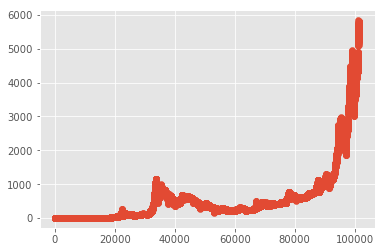

In [11]:
# Let's visualize the trend
plt.scatter([i for i in range(reduced_df.shape[0])], reduced_df["Close"])
plt.show()

## Preprocess data to be understandable

In [2]:
df_reduced = pd.read_excel("data/reduced_data_101529.xlsx")

In [3]:
print(df_reduced.shape)
df_reduced.head()

(101529, 8)


,Close,High,Low,Open,Timestamp,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,1325317920,0.455581,2.0,4.39
30,4.39,4.39,4.39,4.39,1325319720,0.455581,2.0,4.39
60,4.39,4.39,4.39,4.39,1325321520,0.455581,2.0,4.39
90,4.39,4.39,4.39,4.39,1325323320,0.455581,2.0,4.39
120,4.39,4.39,4.39,4.39,1325325120,0.455581,2.0,4.39


In [6]:
# First, let's make some supporting functions
def get_readable_timestamp(timestamp):
    """
    Transforms a unix timestamp into a readable format and puts it in a list
    Args:
        timestamp: input string that contains the unix timestamp
    Returns:
        returns a list that contains the processed timestamp in the following format:
        [year, month, day, hour, minute]
    """
    formatted_timestamp = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y,%m,%d,%H,%M,%S')
    list_formatted_timestamp = formatted_timestamp.split(",")
    return list_formatted_timestamp

In [7]:
new_df_reduced = pd.DataFrame({"year": [], "month": [], "day": [], "hour": [], "minute": [],\
                               "Open": [], "High": [], "Low": [],\
                               "Close": [], "Volume_(BTC)": [], "Volume_(Currency)": [],\
                               "Weighted_Price": []})

In [8]:
index_ = 0
for i in tqdm(range(df_reduced.shape[0])):
    # Save current row
    single_point = df_reduced.iloc[i, :]
    # Process timestamp
    date = get_readable_timestamp(single_point["Timestamp"])
    # Dataframe on the go to append data
    on_the_go_df = pd.DataFrame({"year": date[0], "month": date[1], "day": date[2], "hour": date[3], "minute": date[4],\
                               "Open": single_point["Open"], "High": single_point["High"], "Low": single_point["Low"],\
                               "Close": single_point["Close"], "Volume_(BTC)": single_point["Volume_(BTC)"],\
                                 "Volume_(Currency)": single_point["Volume_(Currency)"], \
                                 "Weighted_Price": single_point["Weighted_Price"]}, index = [index_])
    new_df_reduced = new_df_reduced.append(on_the_go_df, ignore_index = True)
    index_ += 1

100%|████████████████████████████████████████████████| 101529/101529 [1:05:49<00:00, 25.71it/s]


In [10]:
print(new_df_reduced.shape)
new_df_reduced.head(100)

(101529, 12)


,Close,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,day,hour,minute,month,year
0,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,03,52,12,2011
1,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,04,22,12,2011
2,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,04,52,12,2011
3,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,05,22,12,2011
4,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,05,52,12,2011
5,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,06,22,12,2011
6,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,06,52,12,2011
7,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,07,22,12,2011
8,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,07,52,12,2011
9,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,31,08,22,12,2011


In [11]:
new_df_reduced.to_excel("data/data_reduced_datetime_processed.xlsx")